In [ ]:
# Import required packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_location = ".\data"
train_data_location_name = f"{file_location}\Training.csv"
test_data_location_name = f"{file_location}\Testing.csv"


In [129]:
# Load the data 
# We're loading both training and testing data to see what we have to work with

# Load Train Data
train_data = pd.read_csv(train_data_location_name)
print(train_data.shape)
# Load Test Data
test_data = pd.read_csv(test_data_location_name)
print(test_data.shape)

(4920, 134)
(42, 133)


In [ ]:
#print(train_data['prognosis'].value_counts())  # Check count of each diagnosis

# Check the first few diabetes rows fully
print(train_data[train_data['prognosis'] == 'Diabetes '].head())

# Inspect the symptom columns for diabetes rows for unique values
symptom_columns = [col for col in train_data.columns if col != 'prognosis']
print(train_data[train_data['prognosis'] == 'Diabetes'][symptom_columns].nunique())


prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
# Filter the dataframe for only Diabetes
diabetes_rows = train_data[train_data['prognosis'] == 'Diabetes']
print(diabetes_rows.head())
print(diabetes_rows[symptom_columns].sum())


Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cra

In [16]:
# Lets visually explore the data
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [17]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [143]:
# Data Cleaning

# Schema Change
train_data.drop('Unnamed: 133', axis=1, inplace=True) 
train_data["prognosis"].str.strip()
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [33]:
# Lets get some basic idea about the data
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Apply value_counts to all columns except the 'prognosis', while keeping it in the DataFrame
train_column_counts = train_data.loc[:, train_data.columns != 'prognosis'].apply(pd.Series.value_counts)

# Print the result
print(train_column_counts)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0     4242       4134                  4812                 4698       4812   
1      678        786                   108                  222        108   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0    4122        4236          4698     4698              4812  ...   
1     798         684           222      222               108  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                4812        4812      4812          4806   
1                 108         108       108           114   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                 4806                  4806                4806     4806   
1                  114                   114                 114      114   

   red_sore_around_nose  yellow_crust_ooze  
0                  4806               4806  
1                   114                114

In [35]:
# Lets find the unique prognosis on this dataset

unique_prognosis = train_data['prognosis'].unique()

# Print the unique labels

for label in unique_prognosis:
    print(label) 

Fungal infection
Allergy
GERD
Chronic cholestasis
Drug Reaction
Peptic ulcer diseae
AIDS
Diabetes 
Gastroenteritis
Bronchial Asthma
Hypertension 
Migraine
Cervical spondylosis
Paralysis (brain hemorrhage)
Jaundice
Malaria
Chicken pox
Dengue
Typhoid
hepatitis A
Hepatitis B
Hepatitis C
Hepatitis D
Hepatitis E
Alcoholic hepatitis
Tuberculosis
Common Cold
Pneumonia
Dimorphic hemmorhoids(piles)
Heart attack
Varicose veins
Hypothyroidism
Hyperthyroidism
Hypoglycemia
Osteoarthristis
Arthritis
(vertigo) Paroymsal  Positional Vertigo
Acne
Urinary tract infection
Psoriasis
Impetigo


## Exploration 1: Diabetes vs. Heart attack ##

Diabetes is one of the most common chronic diseases affecting people living in Canada.

Around 3.8 million people in Canada over a year old live with diagnosed diabetes (9.6% of the population). This number excludes gestational diabetes. In addition, over 6% of adults in Canada live with prediabetes, which gives them a higher chance of developing type 2 diabetes. The World Health Organization has identified diabetes as one of the major public health challenges of this century.(Reference: Health Canada,https://www.canada.ca/en/public-health/services/diseases/diabetes.html)

According to Heart and Stroke Canada, heart attack occurs when blood flow to a section of the heart becomes blocked and the heart muscle can’t get oxygen. If the blood flow isn’t restored quickly, that section of the heart begins to die. Depending on how long the blood supply is cut off, the damage can be mild, severe or cause lifelong problems. In some cases a heart attack can be fatal. (Reference: Heart and Stroke Canada, https://www.heartandstroke.ca/heart-disease/conditions/heart-attack)

Having diabetes means you are more likely to develop heart disease. People with diabetes are also more likely to have certain risk factors, such as high blood pressure NIH external link or high cholesterol, that increase their chances of having a heart attack or a stroke. (Reference: NIDDK, https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke)

According to Framingham Study,People with type 1 and type 2 diabetes are at significantly increased risk of developing atherosclerotic cardiovascular disease. Diabetes is associated with microvascular and macrovascular complications, and is a major and independent risk factor for CVD. The
lifetime risk for CVD in people with diabetes is high, about 67% in
men and 57% in women at age 50 years (1). In a meta-analysis of
37 prospective cohort studies of fatal coronary heart disease among
a total of 447 064 people, the rate of fatal coronary heart disease
was about 3.5-fold higher in patients with diabetes than in those
without (2). (Reference: Canadian Journal of Diabetes, https://www.canadianjournalofdiabetes.com/article/S1499-2671(13)01209-4/pdf)

Hence, we wanted to first check if someone getting diagnosed with diabetes may also have symptomps associated with heart attack or whether the symptoms have any overlaps. We also wanted to understand how the symtomps can be different for an acute issue (heart attack) vs a chronic issue (diabetes)


In [ ]:
# Filter rows for both diseases
filtered = train_data[train_data['prognosis'].isin(['Heart attack', 'Diabetes '])] #extra space in the value
# Check out the shape of the dataframe
print(filtered.shape)
# Remove the trailing white space in diabetes
filtered["prognosis"] = filtered["prognosis"].str.strip() # Stripping the excess whitespace

In [52]:
# Step 1: Filter rows for both diseases
filtered_train_data = filtered[filtered['prognosis'].isin(['Heart attack', 'Diabetes'])]

# Step 2: Identify symptom columns (excluding 'prognosis')
symptom_columns = [col for col in filtered.columns if col != 'prognosis']

# Step 3: Select only symptom columns with any non-zero value in filtered rows
non_zero_symptom_cols = filtered_train_data[symptom_columns].loc[:, (filtered_train_data[symptom_columns] != 0).any(axis=0)].columns

# Step 4: Create the reduced DataFrame including prognosis + these symptom columns
focused_train_data = filtered_train_data[['prognosis'] + list(non_zero_symptom_cols)]

print(f"Focused DataFrame shape: {focused_train_data.shape}")
print(focused_train_data.head())


Focused DataFrame shape: (240, 15)
   prognosis  vomiting  fatigue  weight_loss  restlessness  lethargy  \
70  Diabetes         0        1            1             1         1   
71  Diabetes         0        1            1             1         1   
72  Diabetes         0        0            1             1         1   
73  Diabetes         0        1            0             1         1   
74  Diabetes         0        1            1             0         1   

    irregular_sugar_level  breathlessness  sweating  \
70                      1               0         0   
71                      1               0         0   
72                      1               0         0   
73                      1               0         0   
74                      1               0         0   

    blurred_and_distorted_vision  chest_pain  obesity  excessive_hunger  \
70                             1           0        1                 1   
71                             1           0       

In [53]:
# Apply value_counts to all columns except the 'prognosis', while keeping it in the DataFrame
train_column_counts = focused_train_data.loc[:, focused_train_data.columns != 'prognosis'].apply(pd.Series.value_counts)

# Print the result
print(train_column_counts)

   vomiting  fatigue  weight_loss  restlessness  lethargy  \
0       132      126          126           126       126   
1       108      114          114           114       114   

   irregular_sugar_level  breathlessness  sweating  \
0                    126             132       132   
1                    114             108       108   

   blurred_and_distorted_vision  chest_pain  obesity  excessive_hunger  \
0                           126         126      126               126   
1                           114         114      114               114   

   increased_appetite  polyuria  
0                 120       120  
1                 120       120  


In [55]:
# --- For Heart Attack prognosis ---
print("Value Counts for 'Heart Attack' Prognosis:")
heart_attack_data = focused_train_data[focused_train_data['prognosis'] == 'Heart attack']
heart_attack_column_counts = heart_attack_data.loc[:, heart_attack_data.columns != 'prognosis'].apply(pd.Series.value_counts)
print(heart_attack_column_counts)
print("\n" + "="*50 + "\n")

# --- For Diabetes prognosis ---
print("Value Counts for 'Diabetes' Prognosis:")
diabetes_data = focused_train_data[focused_train_data['prognosis'] == 'Diabetes']
diabetes_column_counts = diabetes_data.loc[:, diabetes_data.columns != 'prognosis'].apply(pd.Series.value_counts)
print(diabetes_column_counts)
print("\n" + "="*50 + "\n")

Value Counts for 'Heart Attack' Prognosis:
   vomiting  fatigue  weight_loss  restlessness  lethargy  \
0        12    120.0        120.0         120.0     120.0   
1       108      NaN          NaN           NaN       NaN   

   irregular_sugar_level  breathlessness  sweating  \
0                  120.0              12        12   
1                    NaN             108       108   

   blurred_and_distorted_vision  chest_pain  obesity  excessive_hunger  \
0                         120.0           6    120.0             120.0   
1                           NaN         114      NaN               NaN   

   increased_appetite  polyuria  
0               120.0     120.0  
1                 NaN       NaN  


Value Counts for 'Diabetes' Prognosis:
   vomiting  fatigue  weight_loss  restlessness  lethargy  \
0     120.0        6            6             6         6   
1       NaN      114          114           114       114   

   irregular_sugar_level  breathlessness  sweating  \
0     

In [74]:
# Create a copy to avoid modifying the original DataFrame directly
df_corr = focused_train_data.copy()

# 1. Create binary target variables for each prognosis
df_corr['is_heart_attack'] = (df_corr['prognosis'] == 'Heart attack').astype(int)
df_corr['is_diabetes'] = (df_corr['prognosis'] == 'Diabetes').astype(int)

In [75]:
# Identify all factor columns (all columns except 'prognosis' and the new target columns)
feature_columns = [col for col in df_corr.columns if col not in ['prognosis', 'is_heart_attack', 'is_diabetes']]

In [76]:
# Calculate correlation matrix including 'is_heart_attack' and feature columns
heart_attack_correlation_matrix = df_corr[feature_columns + ['is_heart_attack']].corr()
# Extract only the correlations with 'is_heart_attack' and sort them
heart_attack_correlations = heart_attack_correlation_matrix['is_heart_attack'].drop('is_heart_attack').sort_values(ascending=False)
print(heart_attack_correlations)

chest_pain                      0.951190
sweating                        0.904534
vomiting                        0.904534
breathlessness                  0.904534
weight_loss                    -0.951190
lethargy                       -0.951190
blurred_and_distorted_vision   -0.951190
obesity                        -0.951190
excessive_hunger               -0.951190
fatigue                        -0.951190
restlessness                   -0.951190
irregular_sugar_level          -0.951190
increased_appetite             -1.000000
polyuria                       -1.000000
Name: is_heart_attack, dtype: float64


In [77]:
# Calculate correlation matrix including 'is_diabetes' and feature columns
diabetes_correlation_matrix = df_corr[feature_columns + ['is_diabetes']].corr()
# Extract only the correlations with 'is_diabetes' and sort them
diabetes_correlations = diabetes_correlation_matrix['is_diabetes'].drop('is_diabetes').sort_values(ascending=False)
print(diabetes_correlations)

increased_appetite              1.000000
polyuria                        1.000000
restlessness                    0.951190
fatigue                         0.951190
lethargy                        0.951190
irregular_sugar_level           0.951190
obesity                         0.951190
excessive_hunger                0.951190
weight_loss                     0.951190
blurred_and_distorted_vision    0.951190
vomiting                       -0.904534
breathlessness                 -0.904534
sweating                       -0.904534
chest_pain                     -0.951190
Name: is_diabetes, dtype: float64


In [78]:
# Calculate Prevalence (Mean of 1s) for each prognosis ---
# Initialize a dictionary to store prevalence data
prevalence_data = {}

In [79]:
# We are specifically interested in 'Heart Attack' and 'Diabetes'
target_prognoses = ['Heart attack', 'Diabetes']

In [ ]:
# For each prognosis calculate the mean proprotion of positive results (value of 1)

for prognosis_val in target_prognoses:
    # Filter data for the current prognosis
    subset_data = focused_train_data[focused_train_data['prognosis'] == prognosis_val]

    # Calculate the mean (proportion of 1s) for each feature in this subset
    feature_means = subset_data[feature_columns].mean()
    prevalence_data[prognosis_val] = feature_means

In [ ]:
# Convert the resultant dictionary from above to a DataFrame

# Transpose it so features are rows and prognoses are columns
prevalence_df = pd.DataFrame(prevalence_data)

# Sort the features 
prevalence_df = prevalence_df.sort_values(by='Heart attack', ascending=False)
print(prevalence_df)

                              Heart attack  Diabetes
chest_pain                            0.95      0.00
vomiting                              0.90      0.00
breathlessness                        0.90      0.00
sweating                              0.90      0.00
fatigue                               0.00      0.95
weight_loss                           0.00      0.95
restlessness                          0.00      0.95
lethargy                              0.00      0.95
irregular_sugar_level                 0.00      0.95
blurred_and_distorted_vision          0.00      0.95
obesity                               0.00      0.95
excessive_hunger                      0.00      0.95
increased_appetite                    0.00      1.00
polyuria                              0.00      1.00


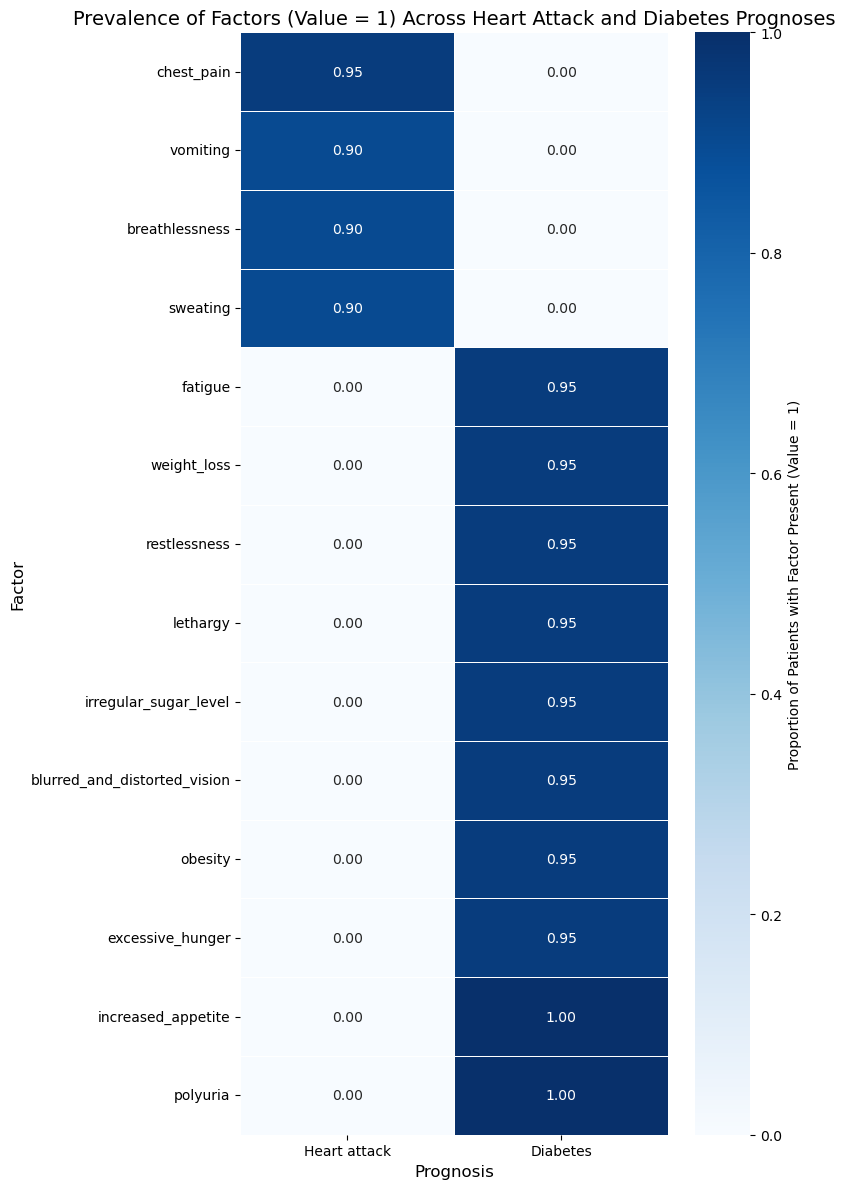

In [ ]:
# Plot the heatmap for proportions

plt.figure(figsize=(8, 12)) # Adjust figure size to fit all factors
sns.heatmap(
    prevalence_df,
    annot=True,        # Show the proportion values on the heatmap
    cmap='Blues',      # Color map: 'Blues', 'viridis', 'YlGnBu' often work well for positive values
    fmt=".2f",         # Format annotation to two decimal places
    linewidths=.5,     # Add lines between cells for clarity
    cbar_kws={'label': 'Proportion of Patients with Factor Present (Value = 1)'}
)
plt.title('Prevalence of Factors (Value = 1) Across Heart Attack and Diabetes Prognoses', fontsize=14)
plt.xlabel('Prognosis', fontsize=12)
plt.ylabel('Factor', fontsize=12)
plt.yticks(rotation=0) # Ensure factor names are readable horizontally
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

> It looks like the associated symptoms are significantly different between the prognosis of Diabetes vs. Heart attack. Furthremore, there seems to be no apparent evidence of overlap of symptoms.

Hence, predicting one vs. the other should be a fairly easy task.

In [86]:
# Import statistical models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
# We already have the feature columns in heart_attack_feature_columns
features = [col for col in focused_train_data.columns if col != 'prognosis']

X_train = focused_train_data[features]
y_train = focused_train_data['prognosis']

model = LogisticRegression(solver='liblinear', random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [93]:
# Filter rows for both diseases for the test dataset
filtered_test = test_data[test_data['prognosis'].isin(['Heart attack', 'Diabetes '])]
# Check out the shape of the dataframe
print(filtered_test.shape)
# Remove the trailing white space in diabetes
filtered_test["prognosis"] = filtered_test["prognosis"].str.strip()

(2, 133)


C:\Users\shafa\AppData\Local\Temp\ipykernel_35572\843350726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test["prognosis"] = filtered_test["prognosis"].str.strip()


In [94]:
# Step 1: Filter rows for both diseases
filtered_test_data = filtered_test[filtered_test['prognosis'].isin(['Heart attack', 'Diabetes'])]

# Step 2: Identify symptom columns (excluding 'prognosis')
symptom_test_columns = [col for col in filtered_test.columns if col != 'prognosis']

# Step 3: Select only symptom columns with any non-zero value in filtered rows
non_zero_symptom_test_cols = filtered_test_data[symptom_columns].loc[:, (filtered_test_data[symptom_columns] != 0).any(axis=0)].columns

# Step 4: Create the reduced DataFrame including prognosis + these symptom columns
focused_test_data = filtered_test_data[['prognosis'] + list(non_zero_symptom_test_cols)]

print(f"Focused DataFrame shape: {focused_test_data.shape}")
print(focused_test_data.head())


Focused DataFrame shape: (2, 15)
       prognosis  vomiting  fatigue  weight_loss  restlessness  lethargy  \
7       Diabetes         0        1            1             1         1   
29  Heart attack         1        0            0             0         0   

    irregular_sugar_level  breathlessness  sweating  \
7                       1               0         0   
29                      0               1         1   

    blurred_and_distorted_vision  chest_pain  obesity  excessive_hunger  \
7                              1           0        1                 1   
29                             0           1        0                 0   

    increased_appetite  polyuria  
7                    1         1  
29                   0         0  


In [ ]:
# Lets identify the columns that are features vs. labels. Here prognosis is the label column
test_features = [col for col in focused_test_data.columns if col != 'prognosis']

X_test = focused_test_data[test_features] 
y_test = focused_test_data['prognosis']

In [ ]:
# Make predictions on test set using the model

y_pred = model.predict(X_test)
y_pred_probability = model.predict_proba(X_test)

In [100]:
# Obtain accuracy score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 1.0000


> The accuracy of 100% above tells us the selected dataset which is a filtered representation of Diabetes and Heart attack is perhaps not a good example of using Machine Learning because even a simple regression can accurately predict it in almost all cases.

> That being said, the dataset seems to be bringing a lot of diseases together where some are completely unlike the other. Due to availability of features and almost recognizable separation in Diabetes vs. Heart attack, this accuracy can be achieved.

In [ ]:
# Lets print the confusion matrix to visually see the results
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"True Negatives (TN): {conf_matrix[0, 0]}")
print(f"False Positives (FP): {conf_matrix[0, 1]}")
print(f"False Negatives (FN): {conf_matrix[1, 0]}")
print(f"True Positives (TP): {conf_matrix[1, 1]}")


Confusion Matrix:
[[1 0]
 [0 1]]
True Negatives (TN): 1
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 1


> It looks like making a regression model with two distinct type of disease makes little sense because the diseases are quite far apart. So, lets find the diseases that are closest to heart attack, and we might be able to find some interesting information

In [102]:
# Group by the prognosis label and calculate the mean for each feature
prognosis_profiles = train_data.groupby('prognosis').mean()
# Lets explore the data
print(prognosis_profiles.head())

                                         itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo      0.0       0.00   
AIDS                                         0.0       0.00   
Acne                                         0.0       0.95   
Alcoholic hepatitis                          0.0       0.00   
Allergy                                      0.0       0.00   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                   0.0   
AIDS                                                      0.0   
Acne                                                      0.0   
Alcoholic hepatitis                                       0.0   
Allergy                                                   0.0   

                                         continuous_sneezing  shivering  \
prognosis                  

In [ ]:
# Lets now find diseases that are closest to Heart attack using cosine distance

from sklearn.metrics import pairwise_distances

# Isolate the feature vector for Heart attack
heart_attack_vector = prognosis_profiles.loc[['Heart attack']]

In [ ]:
# Calculate the Cosine distance from 'Heart attack' to all other prognoses

# The pairwise_distances function returns a matrix, so it will need to be flattened

distances = pairwise_distances(
    heart_attack_vector.to_numpy(), 
    prognosis_profiles.to_numpy(), 
    metric='cosine'
    ).flatten()

In [108]:
# Create a new DataFrame to store the results
distance_results = pd.DataFrame({
    'Prognosis': prognosis_profiles.index,
    'Cosine_Distance': distances
})

In [109]:
# Sort and display the results
closest_prognoses = distance_results.sort_values(by='Cosine_Distance').iloc[1:]

In [110]:
print("Prognoses ranked by similarity to 'Heart attack':")
print(closest_prognoses)

Prognoses ranked by similarity to 'Heart attack':
                                  Prognosis  Cosine_Distance
36                             Tuberculosis         0.506448
34                                Pneumonia         0.544203
16                                     GERD         0.586125
29                                  Malaria         0.651509
25                             Hypoglycemia         0.720350
32             Paralysis (brain hemorrhage)         0.756939
17                          Gastroenteritis         0.756939
23                            Hypertension          0.772409
33                      Peptic ulcer diseae         0.795200
6                          Bronchial Asthma         0.795200
0   (vertigo) Paroymsal  Positional Vertigo         0.796987
9                       Chronic cholestasis         0.813659
3                       Alcoholic hepatitis         0.813659
28                                 Jaundice         0.825694
21                              Hep

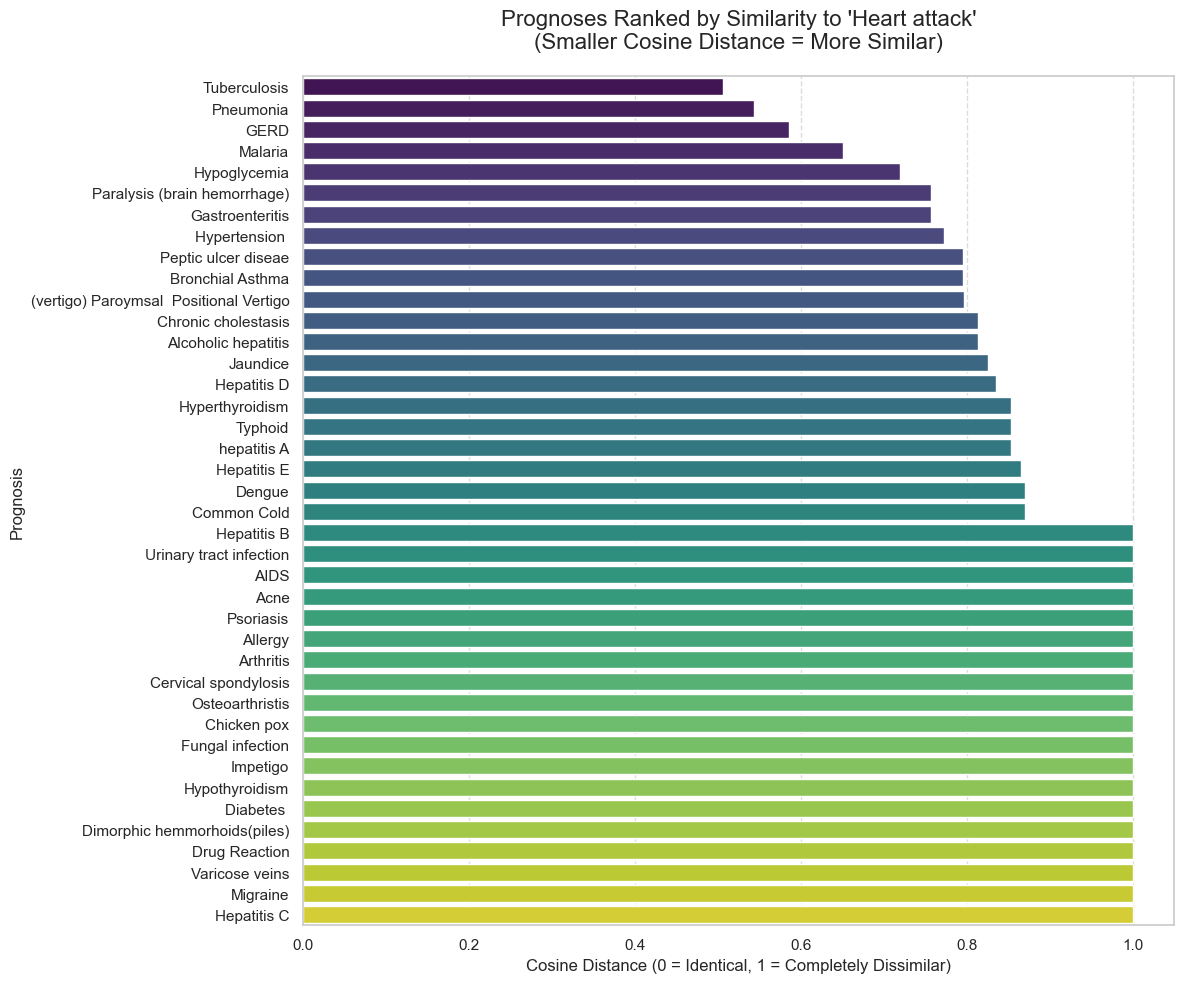

In [113]:
# Lets visualize this data

# Set a style for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

# Create the horizontal bar plot
# We reverse the order of the DataFrame for plotting so the most similar (smallest distance)
# appear at the top of the chart.
sns.barplot(
    x = 'Cosine_Distance',
    y = 'Prognosis',
    data = closest_prognoses,
    palette ='viridis', # A nice color palette
    orient = 'h',
    hue = 'Prognosis',
    legend = False # hiding the legend
)

# Add titles and labels
plt.title("Prognoses Ranked by Similarity to 'Heart attack'\n(Smaller Cosine Distance = More Similar)",
          fontsize=16, pad=20)
plt.xlabel("Cosine Distance (0 = Identical, 1 = Completely Dissimilar)", fontsize=12)
plt.ylabel("Prognosis", fontsize=12)

# Add grid lines for better readability of values
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [114]:
# Lets see if a heatmap is better able to visualize this 

# Heatmap requires a matrix here prognosis will be the index and cosine_distance as the only column

heatmap_data = closest_prognoses.set_index('Prognosis')[['Cosine_Distance']]
print(heatmap_data.head())

              Cosine_Distance
Prognosis                    
Tuberculosis         0.506448
Pneumonia            0.544203
GERD                 0.586125
Malaria              0.651509
Hypoglycemia         0.720350


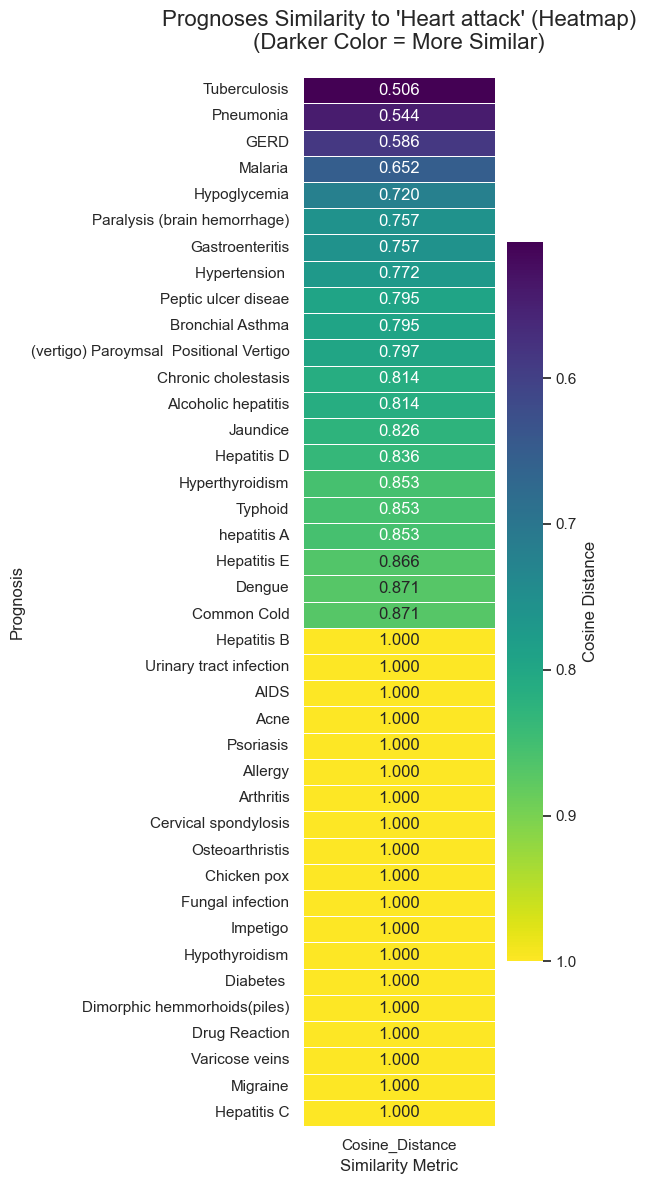

In [ ]:
# Now lets create the heatmap visual here

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 12)) # Adjust figure size to be taller for many prognoses

# Create the heatmap
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',       # 'viridis' maps low values (more similar) to dark colors
    annot=True,           # Show the numerical values on the heatmap
    fmt=".3f",            # Format annotations to 3 decimal places
    linewidths=.5,        # Add lines between cells
    cbar_kws={'label': 'Cosine Distance'} # Label the color bar
)

# --- FLIP THE COLOR BAR'S NUMERICAL SCALE ---
# Get the colorbar object
cbar = ax.collections[0].colorbar
# Invert its y-axis to flip the numerical display
cbar.ax.invert_yaxis()

# Add titles and labels
plt.title("Prognoses Similarity to 'Heart attack' (Heatmap)\n(Darker Color = More Similar)",
          fontsize=16, pad=20)
plt.xlabel("Similarity Metric", fontsize=12) # A generic label, as it's just one column
plt.ylabel("Prognosis", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Filter rows for both diseases because we initially worked with Diabetes and Heart attack, while we are working new prognosis combination.
del filtered
del filtered_test

# Remove the trailing whitespaces
train_data["prognosis"] = train_data["prognosis"].str.strip()
test_data["prognosis"] = test_data["prognosis"].str.strip()

# Filter for the specific data
filtered = train_data[train_data['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()
filtered_test = test_data[test_data['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()

# Check out the shape of the dataframe
print(f"Train data shape{filtered.shape}")
print(f"Test data shape{filtered_test.shape}")



Train data shape(480, 133)
Test data shape(4, 133)


In [145]:
# Lets confirm we are working with the right prognosis dataset

print(f"Unique prognoses in filtered data: {filtered['prognosis'].unique()}")

Unique prognoses in filtered data: ['GERD' 'Tuberculosis' 'Pneumonia' 'Heart attack']


In [146]:
del symptom_columns # delete the old columns

# Define symptom columns (all columns except 'prognosis')
symptom_columns = [col for col in filtered.columns if col != 'prognosis']
print(f"\nNumber of symptom columns: {len(symptom_columns)}")


Number of symptom columns: 132


In [147]:
# Instead of excluding models, lets keep all of those features

# --- Prepare X and y for modeling ---
X = filtered[symptom_columns]
y = filtered['prognosis']

In [148]:
# Import label encoder for scikit-learn 
from sklearn.preprocessing import LabelEncoder

In [149]:
# Encode the target variable 'prognosis' into numerical labels for scikit-learn
# LabelEncoder will assign an integer to each unique prognosis string.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [151]:
# Now lets train a multi-class Logistic Regression model
# 'multi_class='ovr'' (one-vs-rest) trains a binary classifier for each class.
# This allows us to inspect coefficients for each class against all others.
# 'solver='liblinear'' is good for smaller datasets and binary features.
# 'class_weight='balanced'' helps with potential class imbalance.
model = LogisticRegression(
    multi_class='ovr', 
    solver='liblinear', 
    random_state=42, 
    class_weight='balanced', 
    max_iter=1000)

model.fit(X, y_encoded)


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   random_state=42, solver='liblinear')

In [ ]:
# Lets obtain the feature names and class names
feature_names = X.columns
class_names = label_encoder.classes_

In [153]:
# Lets now create a DataFrame to store coefficients for better interpretation
coef_df = pd.DataFrame(model.coef_.T, columns=class_names, index=feature_names)

In [ ]:
# Tesitng to see whether chest pain is closely related to Heart attack 
# How chest_pain represents in other prognosis

print(coef_df.loc['chest_pain'])

GERD           -0.483683
Heart attack    0.284509
Pneumonia      -1.035751
Tuberculosis   -1.355302
Name: chest_pain, dtype: float64


## Reflection and Analysis

> As expected, chest pain is related to heart attack but not an associated symptom for other prognosis.

> One would anticipate, Heart attack would have a higher coefficient. Here is an explanation for it.

 - Within the specific context of distinguishing between 'Heart attack', 'GERD', 'Pneumonia', and 'Tuberculosis', and given all other symptoms: 'chest_pain' has a moderate positive association with 'Heart attack'.

- It has a strong negative association with 'Pneumonia' and 'Tuberculosis', meaning its presence makes those prognoses less likely compared to the others in the 'rest' group.

- The overwhelming presence of chest_pain (114 out of 120) across our filtered dataset for these four diseases might mean it's not a strong discriminator between these specific four diseases, even if it's a necessary symptom for some. The model finds other symptoms more helpful in creating clear boundaries.

In [ ]:
# Lets find the important symptom coefficient for each prognosis

coefficient_threshold = 0.40 # <- update this to higher if one wishes to. I am happy with 0.40

for prognosis_name in class_names:
    # Select the column for the current prognosis
    prognosis_coefficients = coef_df[prognosis_name]

    # Filter symptoms where the absolute coefficient value is greater than the threshold
    significant_symptoms_for_prognosis = prognosis_coefficients[
        prognosis_coefficients.abs() > coefficient_threshold
    ].sort_values(key=abs, ascending=False) # Sort by absolute value descending

    print(f"\n--- Prognosis: {prognosis_name} ---")
    if not significant_symptoms_for_prognosis.empty:
        print(significant_symptoms_for_prognosis)
    else:
        print(f"No symptoms found with absolute coefficient > {coefficient_threshold:.2f} for {prognosis_name}.")


--- Prognosis: GERD ---
breathlessness     -1.808638
sweating           -1.808638
stomach_pain        1.687565
acidity             1.511282
ulcers_on_tongue    1.511282
cough               1.274816
malaise            -0.483784
phlegm             -0.483784
chest_pain         -0.483683
chills             -0.474784
fatigue            -0.474784
high_fever         -0.474784
Name: GERD, dtype: float64

--- Prognosis: Heart attack ---
cough                 -2.189668
stomach_pain          -1.491419
acidity               -1.357058
ulcers_on_tongue      -1.357058
sweating               1.346990
breathlessness         1.346990
phlegm                -1.102865
malaise               -1.102865
chills                -1.065590
high_fever            -1.065590
fatigue               -1.065590
vomiting               0.750653
fast_heart_rate       -0.726835
rusty_sputum          -0.726835
loss_of_appetite      -0.436513
mild_fever            -0.436513
yellowing_of_eyes     -0.436513
swelled_lymph_nodes   -

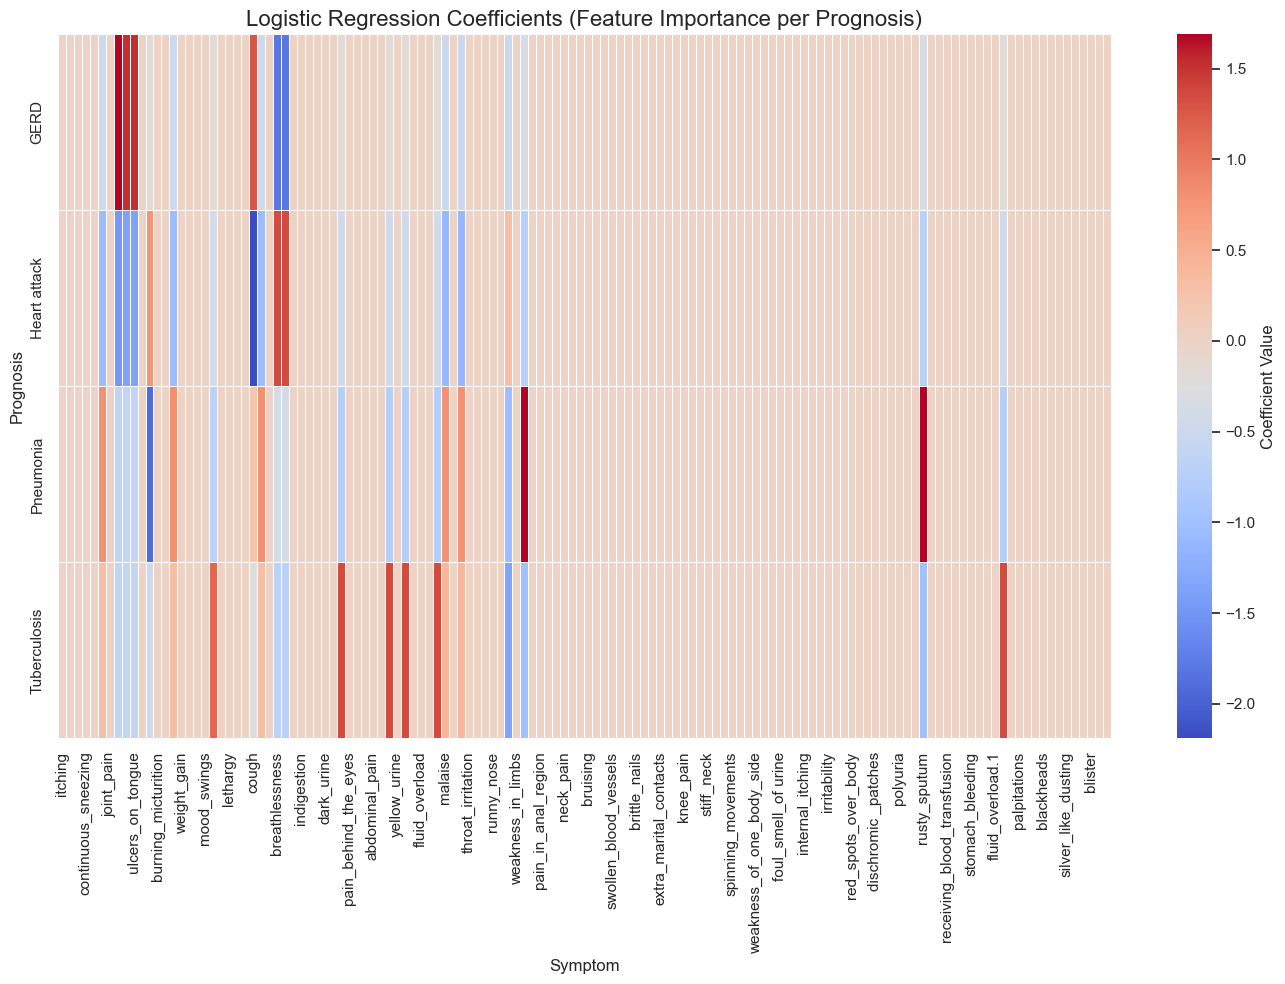

In [191]:
# Now lets visualize Feature Importance as a Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    coef_df.T,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coefficient Value'}
)
plt.title('Logistic Regression Coefficients (Feature Importance per Prognosis)', fontsize=16)
plt.xlabel('Symptom', fontsize=12)
plt.ylabel('Prognosis', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Test for Independence of Symptoms##

The Chi-squared test of independence is used to determine if there is a statistically significant relationship between two categorical variables. In this case, we're testing each binary symptom (categorical: 0 or 1) against the categorical prognosis variable.

- Null Hypothesis (H0): The symptom and prognosis are independent (no association).

- Alternative Hypothesis (H1): The symptom and prognosis are dependent (there is an association).

- P-value: If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis, concluding that there's a statistically significant association.

In [ ]:
# Import chi-square from scipy

from scipy.stats import chi2_contingency

In [ ]:
# Lets do Chi-square test for association

chi2_results = []
for symptom in symptom_columns:
    # Create a contingency table (cross-tabulation) of symptom vs. prognosis
    # Ensure no NaNs in the symptom column before crosstab
    contingency_table = pd.crosstab(filtered[symptom].fillna(0), filtered['prognosis']) # Fill NaNs here too

    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Symptom': symptom, 'Chi2_Statistic': chi2, 'P_Value': p})

# Store the results on a dataframe
chi2_df = pd.DataFrame(chi2_results)

# Sort the results by p-value from lowest to highest. We are trying to find the lowest p-values
chi2_df = chi2_df.sort_values(by='P_Value', ascending=True).reset_index(drop=True)

print("\nChi-squared Test Results (Sorted by P-Value):")
print(chi2_df)

# If p-value is less than 0.05 then we reject the H0. Hence, we are looking for the ones less than 0.05
significant_symptoms = chi2_df[chi2_df['P_Value'] < 0.05]
print(f"\nNumber of statistically significant symptoms (p < 0.05): {len(significant_symptoms)}")
print("Statistically Significant Symptoms:")
print(significant_symptoms)




Chi-squared Test Results (Sorted by P-Value):
                 Symptom  Chi2_Statistic        P_Value
0           rusty_sputum           480.0  1.029881e-103
1             mild_fever           480.0  1.029881e-103
2    swelled_lymph_nodes           480.0  1.029881e-103
3       loss_of_appetite           480.0  1.029881e-103
4      yellowing_of_eyes           480.0  1.029881e-103
..                   ...             ...            ...
127       fluid_overload             0.0   1.000000e+00
128  acute_liver_failure             0.0   1.000000e+00
129         yellow_urine             0.0   1.000000e+00
130     excessive_hunger             0.0   1.000000e+00
131    yellow_crust_ooze             0.0   1.000000e+00

[132 rows x 3 columns]

Number of statistically significant symptoms (p < 0.05): 21
Statistically Significant Symptoms:
                Symptom  Chi2_Statistic        P_Value
0          rusty_sputum      480.000000  1.029881e-103
1            mild_fever      480.000000  1.029881e

### Interpretation of Chi-squared Test Results:

Symptoms with very low P-Values (especially below 0.05) have a statistically significant association with the prognosis.

This means their presence/absence is not independent of the prognosis, suggesting they are relevant features.

The lower the P-Value, the stronger the evidence against independence.

Looks like rusty sputum, mild fever, swelled lymph nodes, loss of appetite and even chest pain and vomiting are statistically significant symptoms.

In [ ]:
# Identifying "Isolating" Symptoms (Prevalence Analysis)

symptom_prevalence = filtered.groupby('prognosis')[symptom_columns].mean()

sorted_symptom_names = sorted(symptom_prevalence.columns)

# Reorder the columns of symptom_prevalence based on the alphabetical sort
symptom_prevalence_sorted = symptom_prevalence[sorted_symptom_names]

# Remove the ones that are zero all across because we get no value from those

symptom_prevalence_filtered_nonzero = symptom_prevalence_sorted.loc[:, (symptom_prevalence_sorted != 0).any(axis=0)]

print("\nSymptom Prevalence (Mean) per Prognosis:")
print(symptom_prevalence_filtered_nonzero)




Symptom Prevalence (Mean) per Prognosis:
              acidity  blood_in_sputum  breathlessness  chest_pain  chills  \
prognosis                                                                    
GERD              0.9              0.0            0.00        0.95    0.00   
Heart attack      0.0              0.0            0.90        0.95    0.00   
Pneumonia         0.0              0.0            0.95        1.00    0.95   
Tuberculosis      0.0              1.0            0.95        1.00    0.95   

              cough  fast_heart_rate  fatigue  high_fever  loss_of_appetite  \
prognosis                                                                     
GERD           0.95              0.0     0.00        0.00               0.0   
Heart attack   0.00              0.0     0.00        0.00               0.0   
Pneumonia      0.95              1.0     0.95        0.95               0.0   
Tuberculosis   0.95              0.0     0.95        0.95               1.0   

              

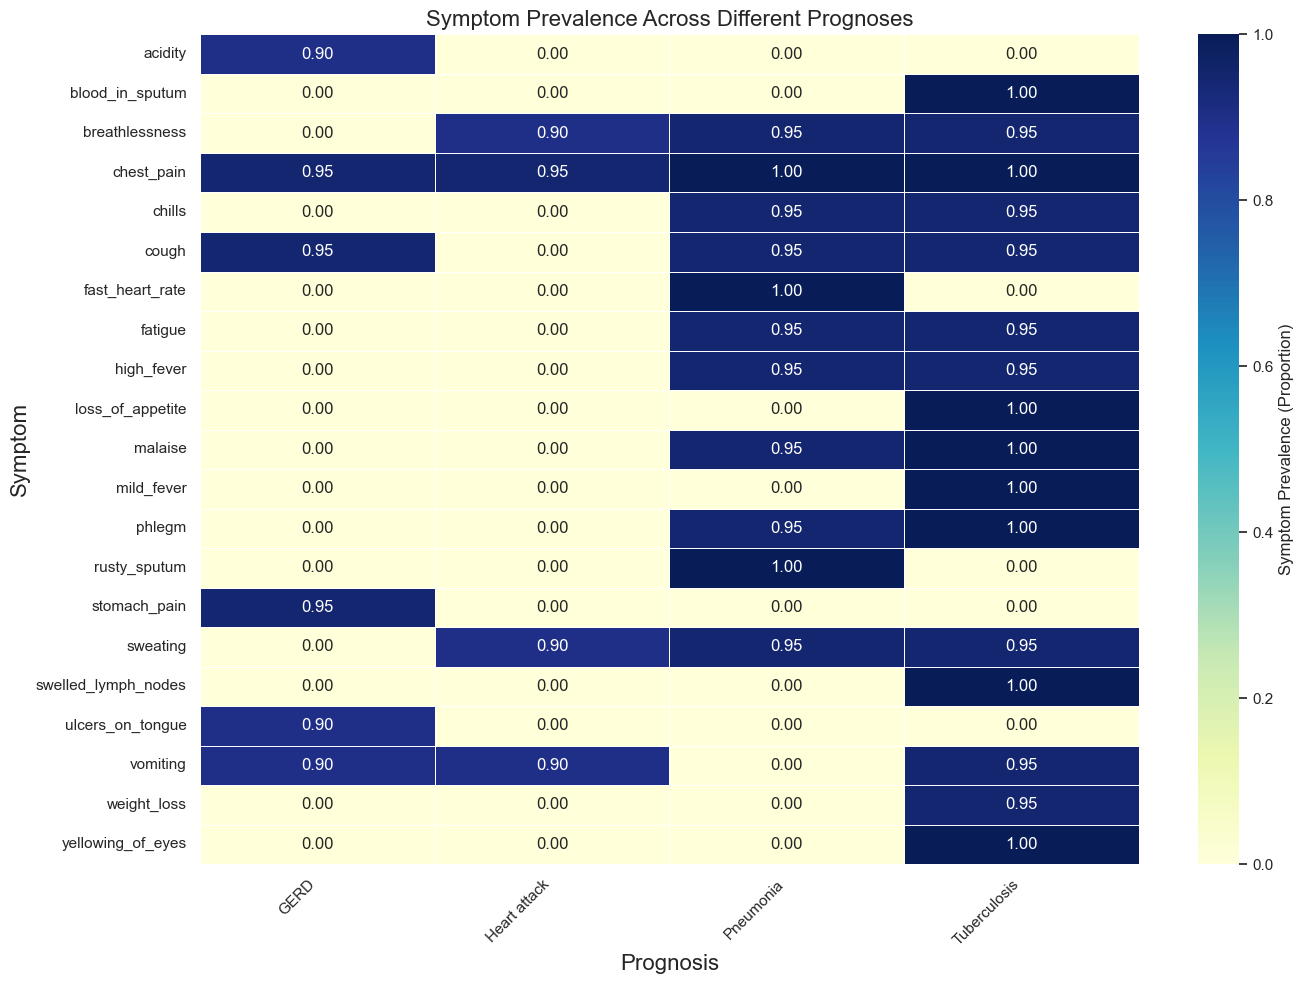

In [ ]:
# Visualize Symptom Prevalence as a Heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(
    symptom_prevalence_filtered_nonzero.T,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Symptom Prevalence (Proportion)'}
)
plt.title('Symptom Prevalence Across Different Prognoses', fontsize=16)
plt.xlabel('Prognosis', fontsize=16)
plt.ylabel('Symptom', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now lets find some of the most isolating features/symptoms for each prognosis from the graph above.

- GERD: acidity, stomach_pain, ulcers_on_tongue

- Heart attack: Unfortunately, none. All the symptoms and features are shared across the other 3 prognosis

- Phneumonia: fast_heart_rate, rusty_sputum

- Tuberculosis: swelled_lymph_nodes, blood_in_sputum, loss_of_apetite and mild_fever

In [180]:
# Calculate variance of prevalence for each symptom across the prognoses
symptom_variance = symptom_prevalence_filtered_nonzero.var(axis=1).sort_values(ascending=False)

# Select the top N symptoms with highest variance
top_n_isolating_symptoms = symptom_variance.head(10).index.tolist() # Adjust N as needed
print(f"\nTop {len(top_n_isolating_symptoms)} symptoms with highest prevalence variance (most isolating):")
print(top_n_isolating_symptoms)


Top 4 symptoms with highest prevalence variance (most isolating):
['Pneumonia', 'GERD', 'Tuberculosis', 'Heart attack']


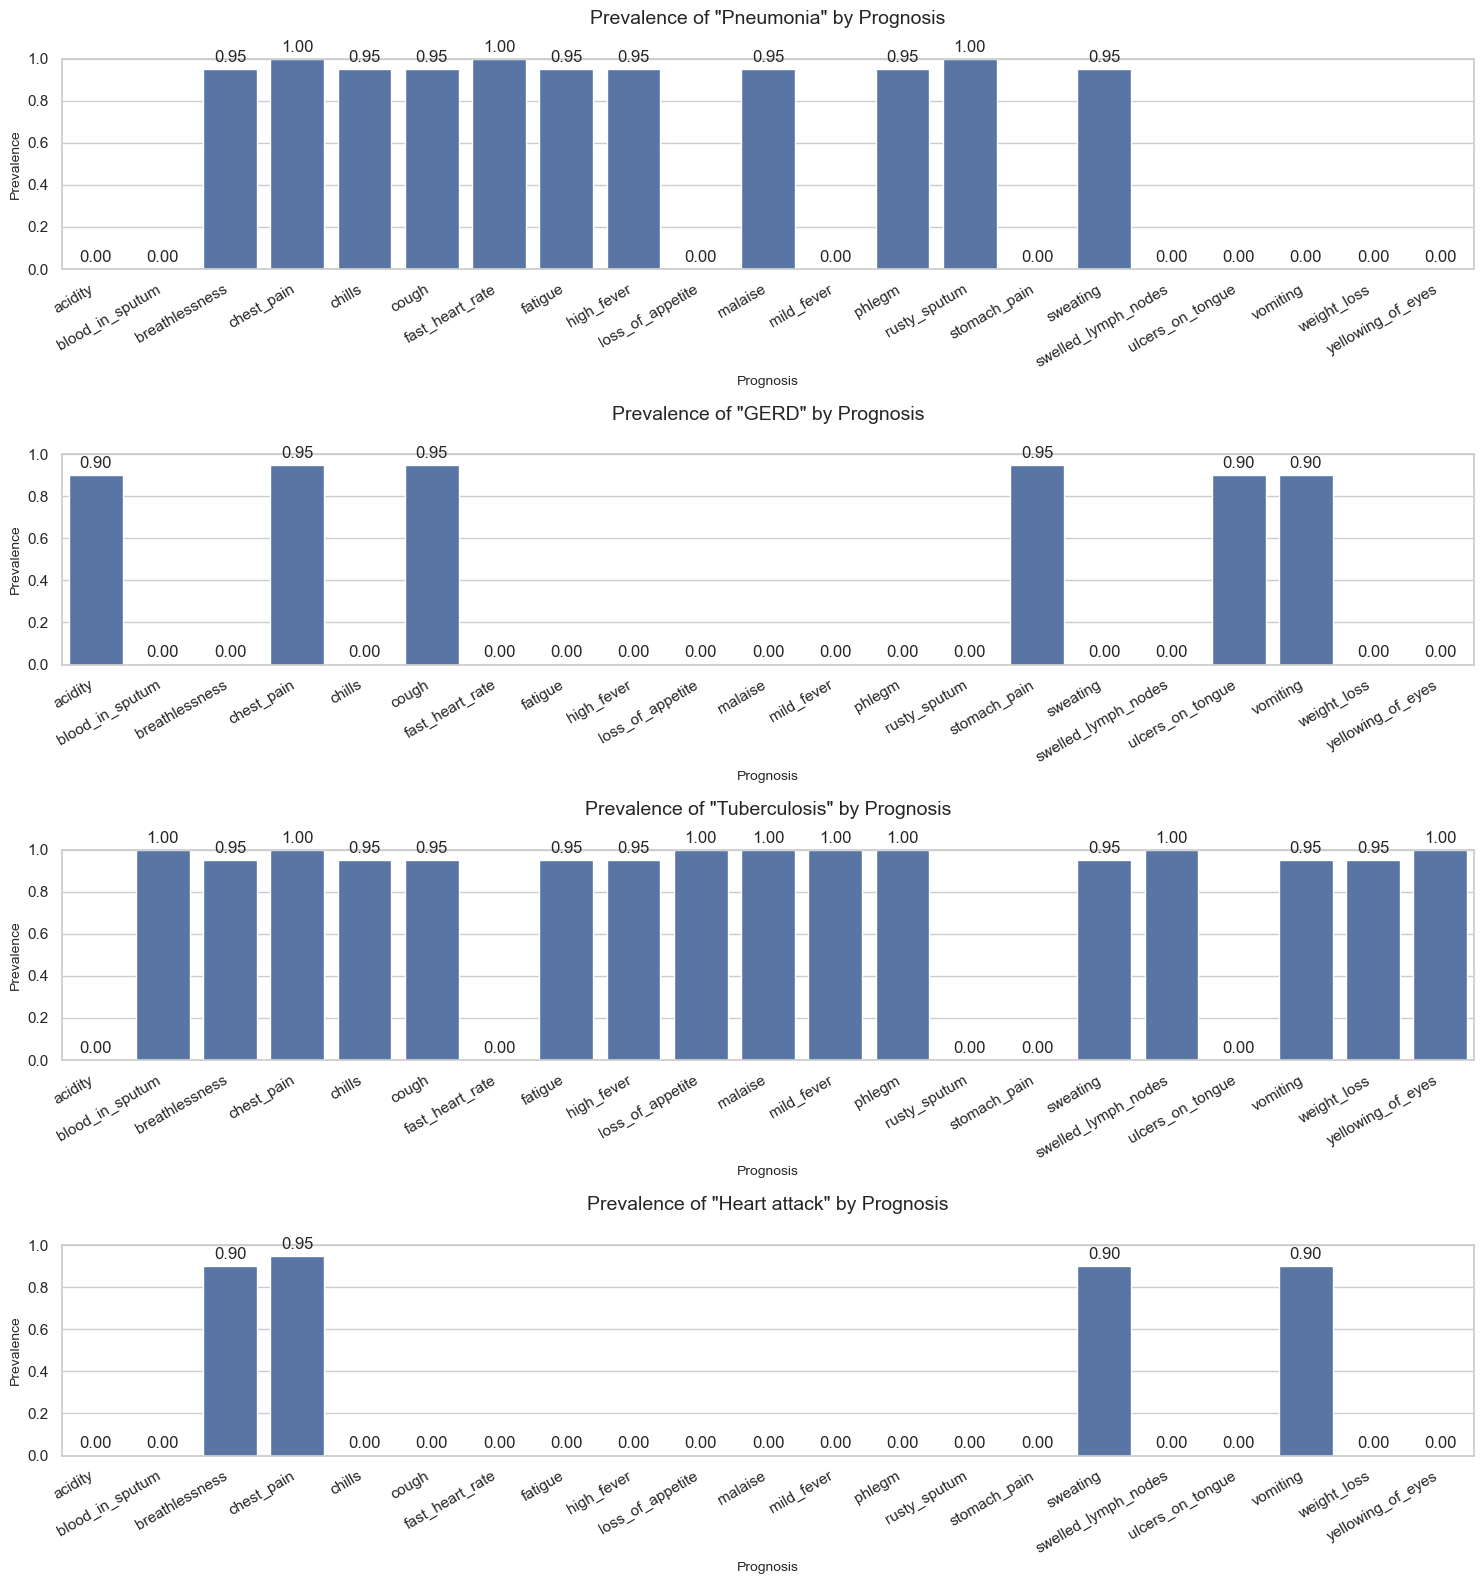

In [ ]:
# Lets plot the isolating feature or symptoms for each prognosis

plt.figure(figsize=(15, 4 * len(top_n_isolating_symptoms))) # Adjust figure height dynamically
for i, symptom in enumerate(top_n_isolating_symptoms):
    plt.subplot(len(top_n_isolating_symptoms), 1, i + 1) # Create a subplot for each symptom
    symptom_data = symptom_prevalence_filtered_nonzero.loc[symptom]
    sns.barplot(x=symptom_data.index, y=symptom_data.values)
    plt.title(f'Prevalence of "{symptom}" by Prognosis', fontsize=14, pad = 25)
    plt.xlabel('Prognosis', fontsize=10)
    plt.ylabel('Prevalence', fontsize=10)
    plt.ylim(0, 1) # Ensure Y-axis goes from 0 to 1 for prevalence
    plt.xticks(rotation=30, ha='right')
    # Add value labels on top of bars
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%.2f', label_type='edge', padding = 3)

plt.subplots_adjust(hspace = 0.8)
plt.tight_layout()
plt.show()

## Result and Key takeaway:

> It looks like Heart attack and GERD has two overlapping symptoms (cough and vomiting), which could lead to confusion. But perhaps sweating and breathlessness are two distinguishing symptoms identifying Heart attack.

> Similarly, TB and Pneumonia share many symptoms, but vomiting, weight_loss, yellowing_of_eyes and blood_in_sputum are distinguishing symptoms for TB, whereas Pneumonia may show fast_heart_rate.

> It looks like Heart attack might be hard to diagnose because it shares all its key symptoms with GERD, Pneumonia and TB. 

> However, a physician might be able to target Heart attack confidently and quickly by excluding the following symptoms.
- acidity, 
- blood_in_sputum, 
- chills, 
- cough, 
- fatigue, 
- fever, 
- malaise, 
- loss_of_apetite, 
- phelgm, 
- rusty_sputum, 
- stomach_pain, 
- ulcers_on_tongue, 
- swelled_lymph_nodes, 
- weightloss
- yellowing_of_eyes 



## Next Steps:

> We will try logistic regression and random forest to test whether we can accurately predict the labels by training a model with these pattern.